![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>
# NYC Public School Test Results Analysis

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

## First impressions of the data
Let gather some basic information from the CSV file. We can do this using `df.head()` and `df.describe()`.

In [149]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [150]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


## Borough rundown
### Tables
Number of boroughs and average breakdown of every stat from each month.


In [151]:
unique_boroughs_list = np.array(schools.borough.unique())
unique_boroughs_number = np.shape(unique_boroughs_list)[0]

print(f"Number of boroughs: {unique_boroughs_number}\n")

print("List of every borough:")
for borough in sorted(unique_boroughs_list):
    print(borough)

average_list = ['average_math', 'average_reading', 'average_writing'] 
borough_averages = schools.groupby('borough')[average_list].mean().round(1)
borough_averages

Number of boroughs: 5

List of every borough:
Bronx
Brooklyn
Manhattan
Queens
Staten Island


,average_math,average_reading,average_writing
borough,,,
Bronx,404.4,402.5,395.8
Brooklyn,416.4,410.8,403.1
Manhattan,455.9,444.9,439.3
Queens,462.4,443.3,439.9
Staten Island,486.2,478.5,474.3


### Visualisations
Let us visualise our results with a side by side bar chart.

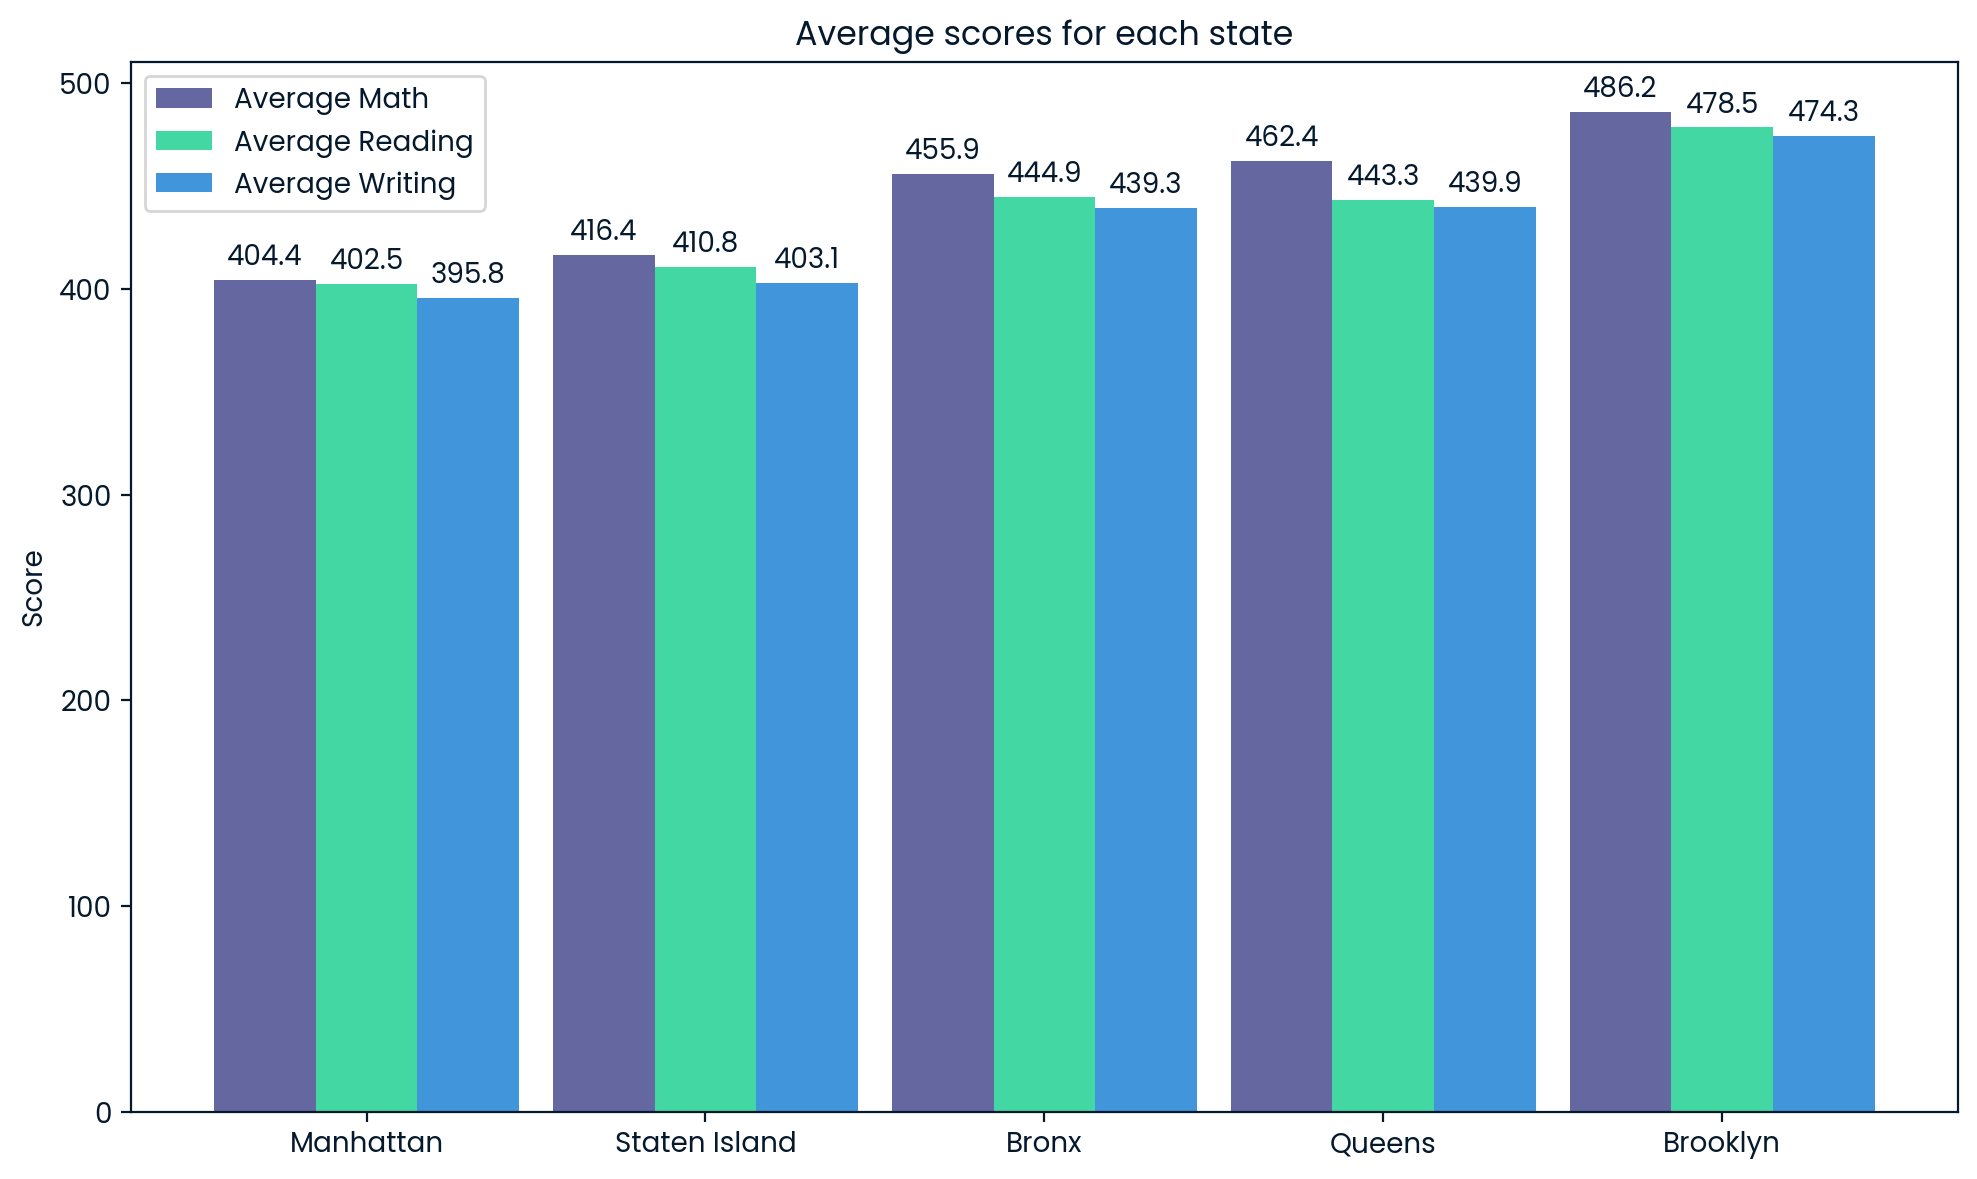

In [152]:
# Sample data
unique_boroughs_list
average_math    = [num for num in borough_averages.average_math]
average_reading = [num for num in borough_averages.average_reading]
average_writing = [num for num in borough_averages.average_writing]

# Number of cities
x = np.arange(len(unique_boroughs_list))

# Width of the bars
width = 0.3

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting men and women side by side
rects1 = ax.bar(x - width, average_math, width, label = 'Average Math')
rects2 = ax.bar(x, average_reading, width, label = 'Average Reading')
rects3 = ax.bar(x + width, average_writing, width, label = 'Average Writing')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Average scores for each state')
ax.set_xticks(x)
ax.set_xticklabels(unique_boroughs_list)
ax.legend()

# Function to add values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

# Show the plot
plt.tight_layout()
plt.show()

## Building code breakdown
### Tables
Let us generate a similar table for the building code.

In [153]:
print(f"Number of building codes: {np.shape(schools.building_code.unique())[0]}\n")

building_code_averages = schools.groupby('building_code').mean()
building_code_averages['average_english_index'] = ((building_code_averages.average_reading + building_code_averages.average_writing) / 2)

# Get top 10 building codes with the highest english rating.
building_code_averages = building_code_averages.sort_values('average_english_index', ascending = False).round(1)
building_code_averages['first_letter_building_code'] = building_code_averages.index.str[0]
building_code_averages.head(10)

Number of building codes: 233



,average_math,average_reading,average_writing,percent_tested,average_english_index,first_letter_building_code
building_code,,,,,,
M477,754.0,697.0,693.0,97.4,695.0,M
X905,669.0,672.0,672.0,91.8,672.0,X
R440,711.0,660.0,670.0,99.7,665.0,R
X445,714.0,660.0,667.0,97.0,663.5,X
Q515,680.0,640.0,661.0,97.1,650.5,Q
M097,634.0,641.0,639.0,70.8,640.0,M
Q798,633.0,620.0,628.0,98.5,624.0,Q
M855,641.0,617.0,631.0,86.0,624.0,M
Q774,701.0,621.0,625.0,97.9,623.0,Q


### Visualisations

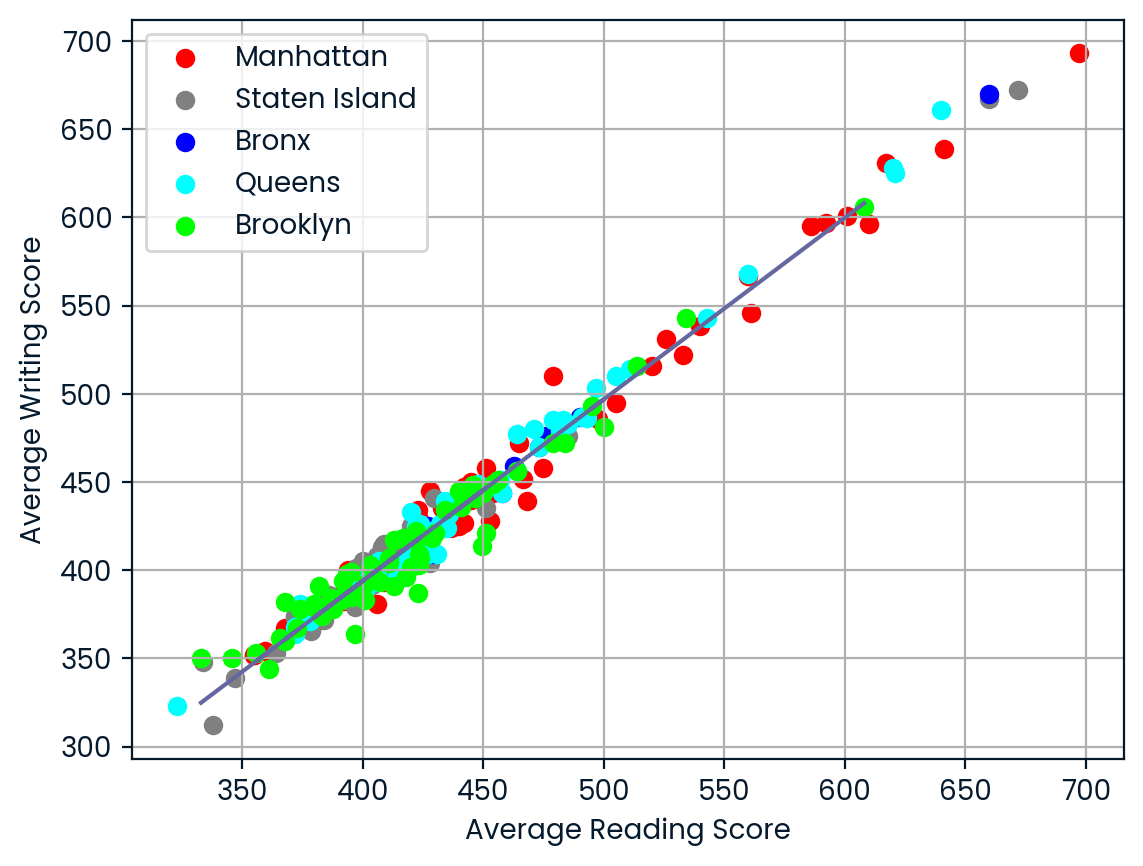

In [154]:
average_reading_score = np.array(building_code_averages.average_reading)
average_writing_score = np.array(building_code_averages.average_writing)
postcode_letter = np.array(building_code_averages.index.str[0].unique())

# Define distinct colors for each letter
colors = {'Bronx': 'blue', 'Brooklyn': '#00FF00', 'Queens': '#00FFFF', 'Manhattan': 'red', 'Staten Island': 'grey'}

fig, ax = plt.subplots()

# Iterate through each unique postcode letter
for borough, letter in zip(unique_boroughs_list, postcode_letter):
    # Filter the boroughs by the first letter of the postcode
    reading_scores = np.array(building_code_averages.loc[building_code_averages.first_letter_building_code == letter].average_reading)
    writing_scores = np.array(building_code_averages.loc[building_code_averages.first_letter_building_code == letter].average_writing)
    
    # Scatter plot with distinct colors
    ax.scatter(reading_scores, writing_scores, label=borough, color=colors[borough])

#find line of best fit
m, c = np.polyfit(average_reading_score, average_writing_score, 1)

#add line of best fit to plot
plt.plot(reading_scores, m * reading_scores + c)     

ax.set_xlabel('Average Reading Score')
ax.set_ylabel('Average Writing Score')
ax.legend()
ax.grid(True)

plt.show()

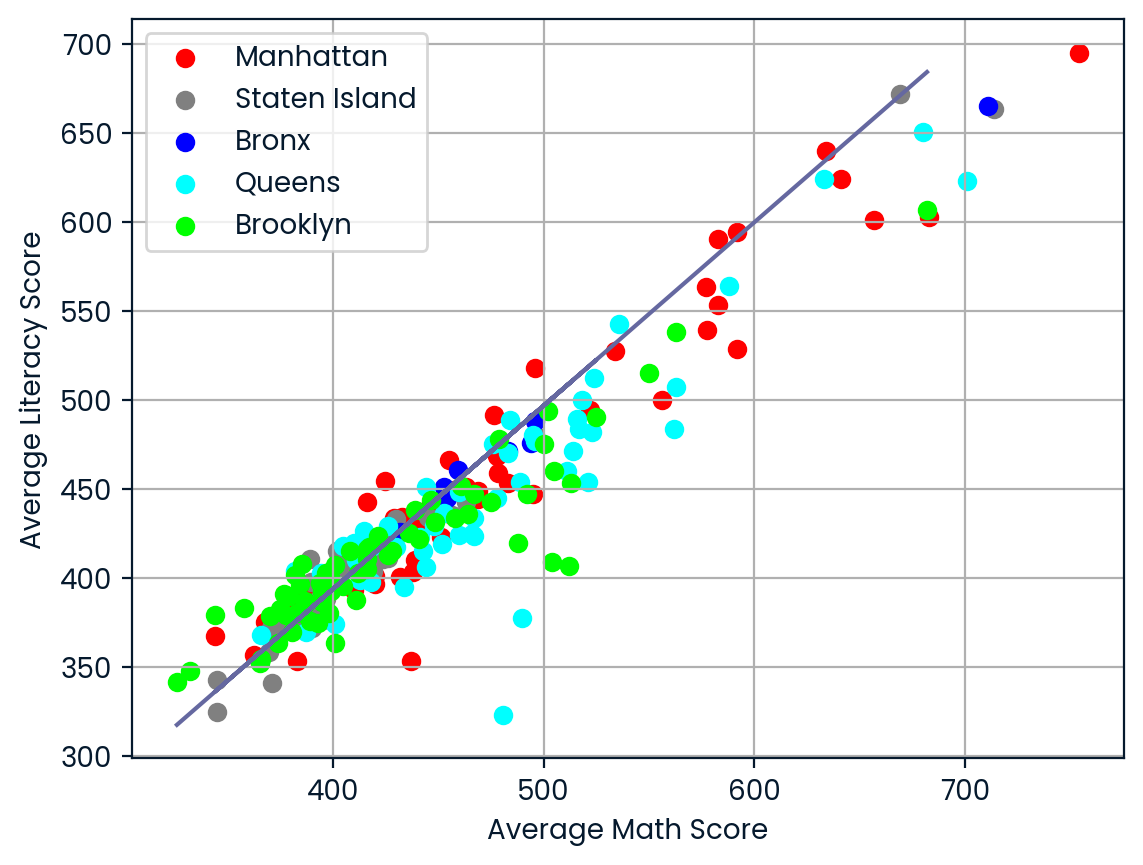

In [155]:
average_math_score = np.array(building_code_averages.average_math)
english_index = np.array(building_code_averages.average_english_index)
postcode_letter = np.array(building_code_averages.index.str[0].unique())

# Define distinct colors for each letter
colors = {'Bronx': 'blue', 'Brooklyn': '#00FF00', 'Queens': '#00FFFF', 'Manhattan': 'red', 'Staten Island': 'grey'}

fig, ax = plt.subplots()

# Iterate through each unique postcode letter
for borough, letter in zip(unique_boroughs_list, postcode_letter):
    # Filter the boroughs by the first letter of the postcode
    reading_scores = np.array(building_code_averages.loc[building_code_averages.first_letter_building_code == letter].average_math)
    writing_scores = np.array(building_code_averages.loc[building_code_averages.first_letter_building_code == letter].average_english_index)
    
    # Scatter plot with distinct colors
    ax.scatter(reading_scores, writing_scores, label=borough, color=colors[borough]) 

#find line of best fit
m, c = np.polyfit(average_reading_score, average_writing_score, 1)

#add line of best fit to plot
plt.plot(reading_scores, m * reading_scores + c)    
    
ax.set_xlabel('Average Math Score')
ax.set_ylabel('Average Literacy Score')
ax.legend()
ax.grid(True)

plt.show()

## Best Math Results 

Which NYC schools have the best math results? The best math results are at least 80% of the **maximum possible score of 800** for math.

In [156]:
best_math_schools = schools[["school_name", "average_math"]].loc[schools["average_math"] >= 640 ].sort_values("average_math", ascending = False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


## Top 10 performing schools
What are the top 10 performing schools based on the combined SAT scores?

In [157]:
school_performance = pd.DataFrame(schools[["school_name", "borough"]])

school_performance["total_SAT"] = schools.average_math + schools.average_reading + schools.average_writing

school_performance = school_performance.sort_values("total_SAT", ascending = False)

top_10_schools = school_performance[["school_name", "total_SAT"]].head(10)
school_performance

,school_name,borough,total_SAT
88,Stuyvesant High School,Manhattan,2144
170,Bronx High School of Science,Bronx,2041
93,Staten Island Technical High School,Staten Island,2041
174,High School of American Studies at Lehman College,Bronx,2013
333,Townsend Harris High School,Queens,1981
...,...,...,...
171,Kingsbridge International High School,Bronx,987
337,Pan American International High School,Queens,978
295,International High School at Prospect Heights,Brooklyn,946
247,Multicultural High School,Brooklyn,926


Which single borough has the largest standard deviation in the combined SAT score?

In [158]:
largest_std_dev = pd.DataFrame()

largest_std_dev["borough"] = schools["borough"].unique()

largest_std_dev = school_performance.groupby("borough")["total_SAT"].agg([len, np.mean, np.std]).round(2)

largest_std_dev = largest_std_dev.sort_values("std", ascending=False).head(1)

largest_std_dev.rename(columns={
    'len': 'num_schools',
    'mean': 'average_SAT',
    'std': 'std_SAT'
}, inplace=True)

largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
